<a href="https://colab.research.google.com/github/Cathoke/SC2002-HMS/blob/master/RetailSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
from google.colab import files
uploaded = files.upload()

df=pd.read_csv("train.csv")
df.head(5)


Saving train.csv to train (1).csv


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [46]:
df.info()
df.isna().sum()
df.drop(columns=['Postal Code'], inplace=True)
print(type(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [47]:
df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst=True,errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'],dayfirst=True,errors='coerce')


# Convert categorical variables to 'category' type for better performance
categorical_cols = ['Ship Mode', 'Segment', 'Country', 'City', 'State',
                    'Region', 'Category', 'Sub-Category']
df[categorical_cols] = df[categorical_cols].astype('category')

# Convert ID-based columns to string (object)
id_cols = ['Order ID', 'Customer ID', 'Product ID', 'Customer Name', 'Product Name']
df[id_cols] = df[id_cols].astype(str)

# Verify changes
print(df.dtypes)

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode              category
Customer ID              object
Customer Name            object
Segment                category
Country                category
City                   category
State                  category
Region                 category
Product ID               object
Category               category
Sub-Category           category
Product Name             object
Sales                   float64
dtype: object


In [48]:
duplicates = df.duplicated()
print(f"Total duplicate rows: {duplicates.sum()}")


Total duplicate rows: 0


In [49]:
product_region_sales = df.groupby(['Product ID', 'Region'])['Sales'].sum().reset_index()

# Display top products by sales in each region
print(product_region_sales.sort_values(by='Sales', ascending=False).head(10))

           Product ID   Region      Sales
6453  TEC-CO-10004722     East  30099.914
6566  TEC-MA-10002412    South  22638.480
6452  TEC-CO-10004722  Central  17499.950
6517  TEC-MA-10001047     East  14299.890
6492  TEC-MA-10000822  Central  14279.916
6455  TEC-CO-10004722     West  13999.960
5679  OFF-SU-10000151     West  13100.240
193   FUR-BO-10004834     East  11717.034
6522  TEC-MA-10001127    South  11374.935
2728  OFF-BI-10001120  Central  11339.940


<ipython-input-49-30698d2076c2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_region_sales = df.groupby(['Product ID', 'Region'])['Sales'].sum().reset_index()


In [50]:
# Group by 'Category' and sum the total sales
category_sales = df.groupby('Category')['Sales'].sum().reset_index()
category_counts = df.groupby('Category')['Sales'].count().reset_index()


# Sort categories by sales in descending order
category_sales['avg']=np.divide(category_sales['Sales'],category_counts['Sales'])

category_sales = category_sales.sort_values(by='Sales', ascending=False)

# Display the result
print(category_sales)


          Category        Sales         avg
2       Technology  827455.8730  456.401474
0        Furniture  728658.5757  350.653790
1  Office Supplies  705422.3340  119.381001


<ipython-input-50-eddcd73e9ceb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_sales = df.groupby('Category')['Sales'].sum().reset_index()
<ipython-input-50-eddcd73e9ceb>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_counts = df.groupby('Category')['Sales'].count().reset_index()


In [57]:
# Group by 'Region' and 'Category' and sum the sales
category_region_sales = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()

# Sort sales within each region in descending order
category_region_sales = category_region_sales.sort_values(by=['Region', 'Sales'], ascending=[True, False])

# Display result
for region in category_region_sales['Region'].unique():
    print(f"\nTop Categories in {region}:")
    display(category_region_sales[category_region_sales['Region'] == region][['Category', 'Sales']])



Top Categories in Central:


<ipython-input-57-247b067c672a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_region_sales = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()


,Category,Sales
2,Technology,168739.2080
1,Office Supplies,163590.2430
0,Furniture,160317.4622



Top Categories in East:


,Category,Sales
5,Technology,263116.527
3,Furniture,206461.388
4,Office Supplies,199940.811



Top Categories in South:


,Category,Sales
8,Technology,148195.208
7,Office Supplies,124424.771
6,Furniture,116531.480



Top Categories in West:


,Category,Sales
11,Technology,247404.9300
9,Furniture,245348.2455
10,Office Supplies,217466.5090


In [58]:
# Group by 'Region' and 'Category' and sum the sales
category2_region_sales = df.groupby(['Category', 'Region'])['Sales'].sum().reset_index()

# Sort sales within each region in descending order
category2_region_sales = category_region_sales.sort_values(by=['Region', 'Sales'], ascending=[True, False])

# Display result
for category in category2_region_sales['Category'].unique():
    print(f"\nTop Regions in {category}:")
    display(category2_region_sales[category_region_sales['Category'] == category][['Region', 'Sales']])


Top Regions in Technology:


<ipython-input-58-126d7f442aaa>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category2_region_sales = df.groupby(['Category', 'Region'])['Sales'].sum().reset_index()


,Region,Sales
2,Central,168739.208
5,East,263116.527
8,South,148195.208
11,West,247404.930



Top Regions in Office Supplies:


,Region,Sales
1,Central,163590.243
4,East,199940.811
7,South,124424.771
10,West,217466.509



Top Regions in Furniture:


,Region,Sales
0,Central,160317.4622
3,East,206461.3880
6,South,116531.4800
9,West,245348.2455


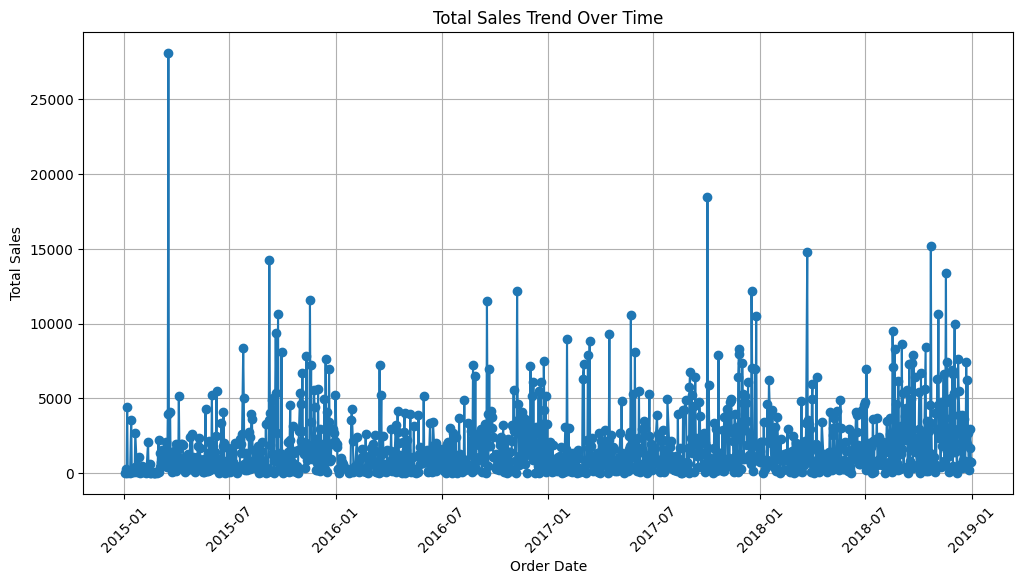

In [61]:


# Aggregate total sales by Order Date
sales_trend = df.groupby('Order Date')['Sales'].sum().reset_index()

# Plot sales trend
plt.figure(figsize=(12, 6))
plt.plot(sales_trend['Order Date'], sales_trend['Sales'], marker='o', linestyle='-')

# Formatting the plot
plt.title("Total Sales Trend Over Time")
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()


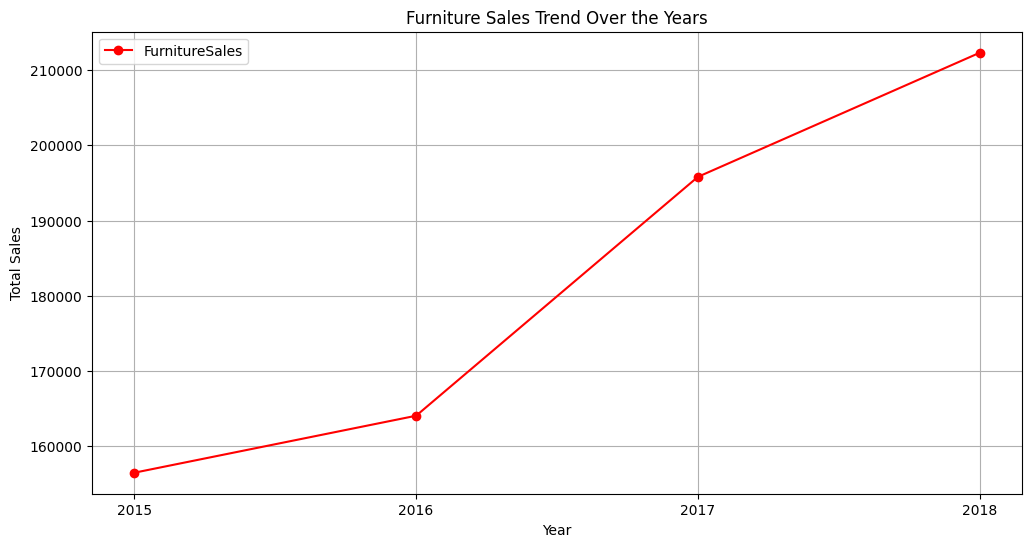

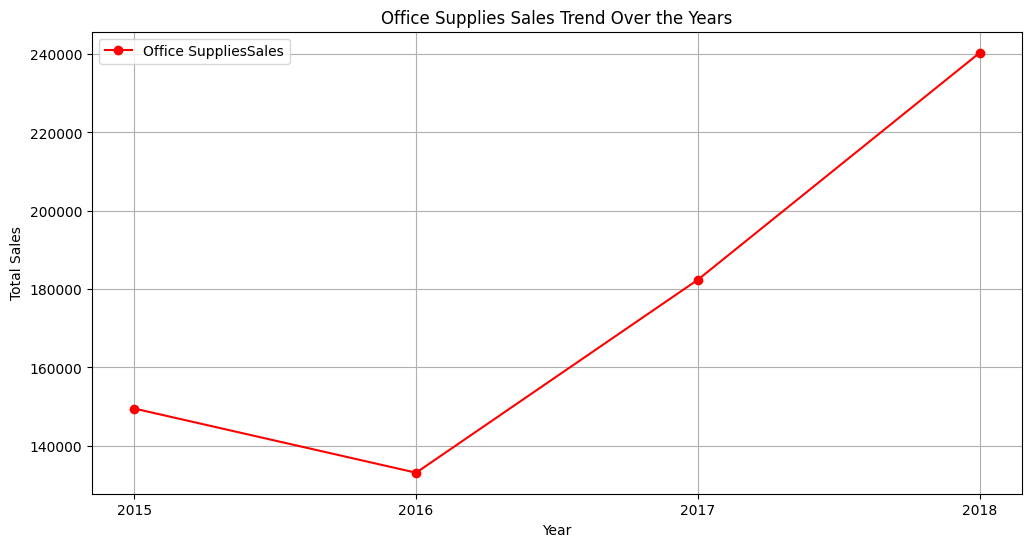

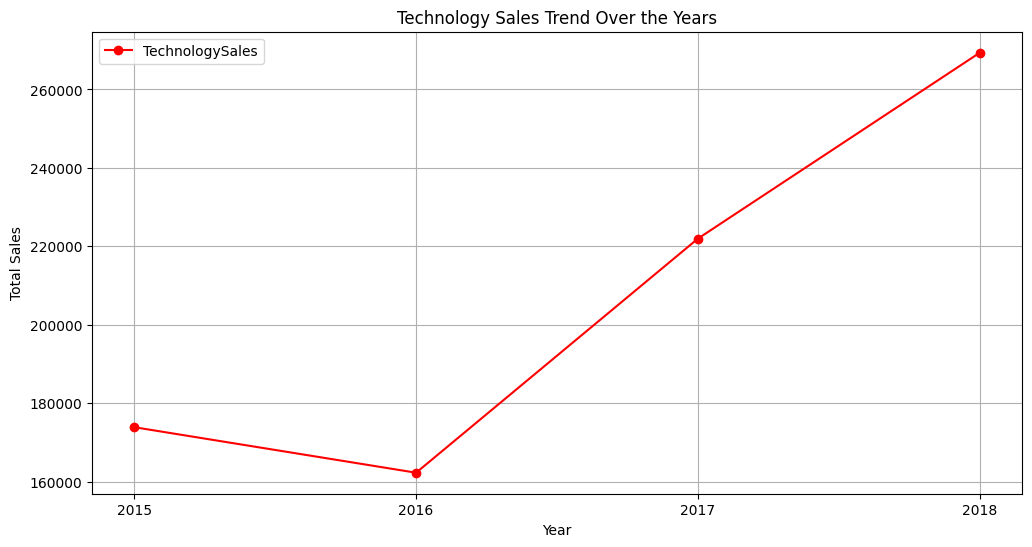

In [62]:
# Convert 'Order Date' to year format
df['Year'] = df['Order Date'].dt.year

for cat in df['Category'].unique():
# Filter only Furniture sales
    sales = df[df['Category'] == cat].groupby('Year')['Sales'].sum().reset_index()

    # Plot line graph for Furniture sales trend
    plt.figure(figsize=(12, 6))
    plt.plot(sales['Year'], sales['Sales'], marker='o', linestyle='-', color='r', label=f"{cat}Sales")

    # Formatting
    plt.title(f"{cat} Sales Trend Over the Years")
    plt.xlabel("Year")
    plt.ylabel("Total Sales")
    plt.xticks(sales['Year'])  # Ensure only actual years are shown
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()


<ipython-input-63-96102e5241e2>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby(['Month', 'Category'])['Sales'].sum().reset_index()
<ipython-input-63-96102e5241e2>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=monthly_sales, x='Month', y='Sales', hue='Category', ci=None)


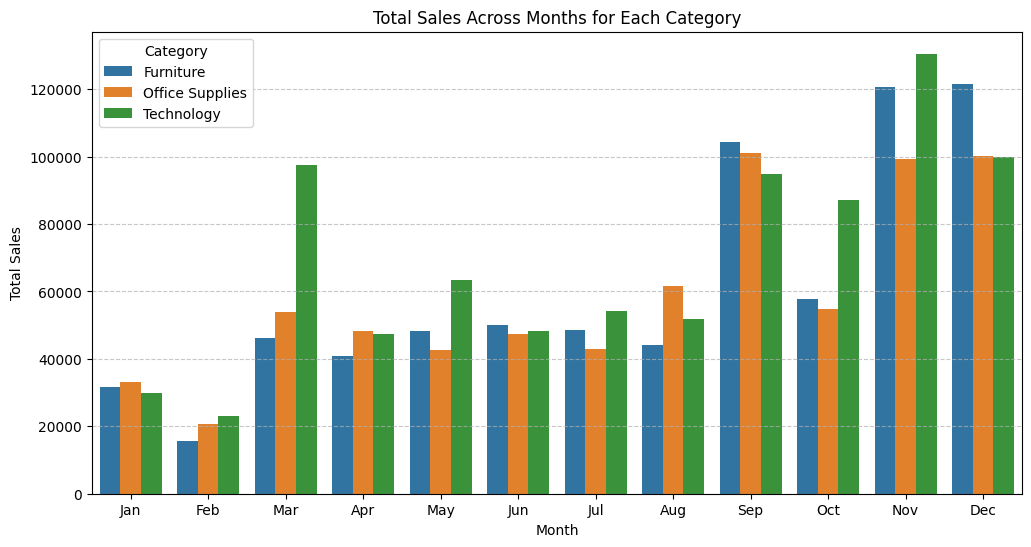

In [63]:
# Extract month from 'Order Date'
df['Month'] = df['Order Date'].dt.month

# Group by 'Month' and 'Category' to get total sales
monthly_sales = df.groupby(['Month', 'Category'])['Sales'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x='Month', y='Sales', hue='Category', ci=None)

# Formatting the chart
plt.title("Total Sales Across Months for Each Category")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Category")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

<ipython-input-64-182717cb9828>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Month', 'Region', 'Category'])['Sales'].sum().reset_index()


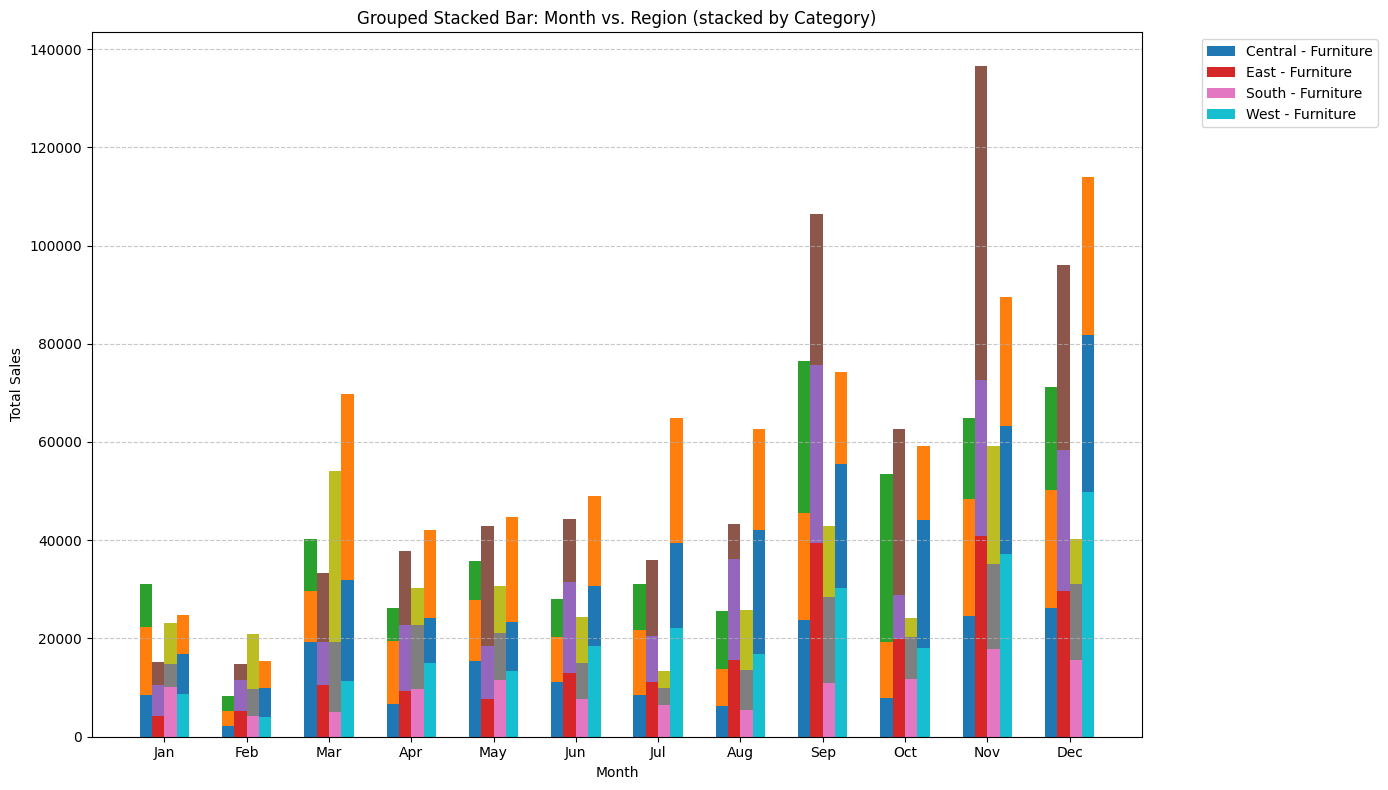

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1) PREPARE DATA
# Extract Month from 'Order Date'
df['Month'] = df['Order Date'].dt.month

# Group by 'Month', 'Region', and 'Category' to get total sales
grouped_data = df.groupby(['Month', 'Region', 'Category'])['Sales'].sum().reset_index()

# Get unique Regions & Categories (for iteration)
regions = grouped_data['Region'].unique()
categories = grouped_data['Category'].unique()

# 2) SETUP PLOTTING
plt.figure(figsize=(14, 8))
bar_width = 0.15  # width of each region's bar
x_months = range(1, 13)  # 1 through 12 for months

# 3) LOOP THROUGH REGIONS & STACK CATEGORIES
for r_idx, region in enumerate(regions):
    # We'll track the bottom (starting height) for each bar in each month
    bottoms = {m: 0 for m in x_months}

    # SHIFT each region's bar on the x-axis so they're side-by-side
    # e.g., if we have 4 regions, each bar shifts by 0.15
    x_positions = [m + r_idx * bar_width - (len(regions) - 1) * bar_width / 2 for m in x_months]

    for c_idx, cat in enumerate(categories):
        # Filter data for the current (region, category)
        subset = grouped_data[(grouped_data['Region'] == region) & (grouped_data['Category'] == cat)]

        # Create a dictionary: {month: sales_value}
        sales_dict = {row['Month']: row['Sales'] for _, row in subset.iterrows()}

        # Prepare lists for bar plotting
        y_vals = []
        bottoms_list = []
        for m in x_months:
            # Sales for this month (default to 0 if missing)
            sales_val = sales_dict.get(m, 0)
            y_vals.append(sales_val)
            bottoms_list.append(bottoms[m])

        # PLOT stacked bar for this category
        # Only add label for the first category in each region to avoid legend spam
        label = f"{region} - {cat}" if c_idx == 0 else None

        plt.bar(
            x_positions,
            y_vals,
            width=bar_width,
            bottom=bottoms_list,
            label=label
        )

        # Update bottoms so next category stacks above
        for m_idx, m in enumerate(x_months):
            bottoms[m] += y_vals[m_idx]

# 4) FORMAT & SHOW
plt.title("Grouped Stacked Bar: Month vs. Region (stacked by Category)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1, 13), ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-65-0d1d42315319>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_month, x='Month', y='Sales', ci=None)


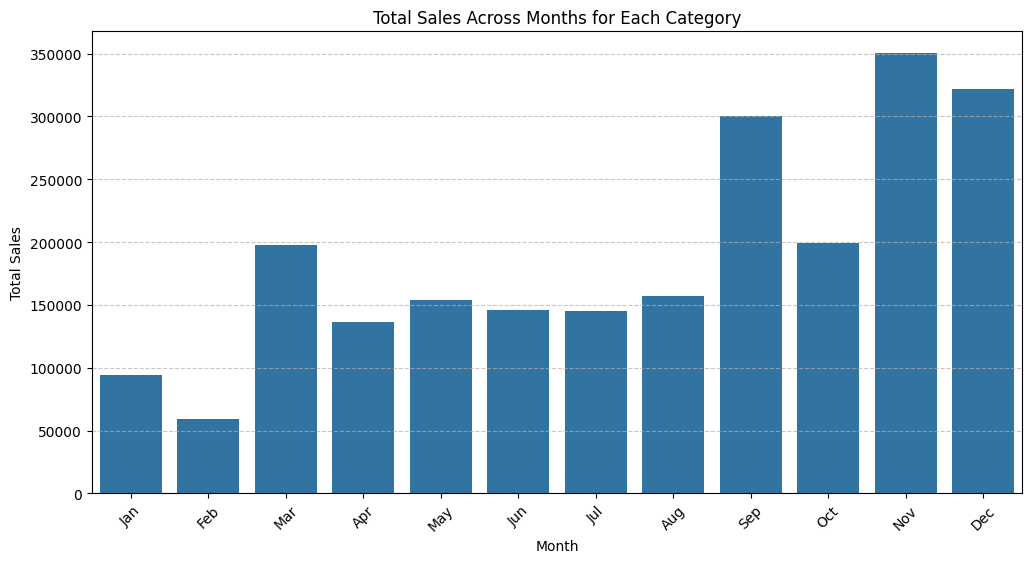

In [65]:
# Notice the parentheses after sum() — this is crucial.
df_month = df.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=df_month, x='Month', y='Sales', ci=None)
plt.title("Total Sales Across Months for Each Category")
plt.xticks(range(0,12), ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], rotation=45)
plt.ylabel("Total Sales")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Axes: xlabel='Order Date'>

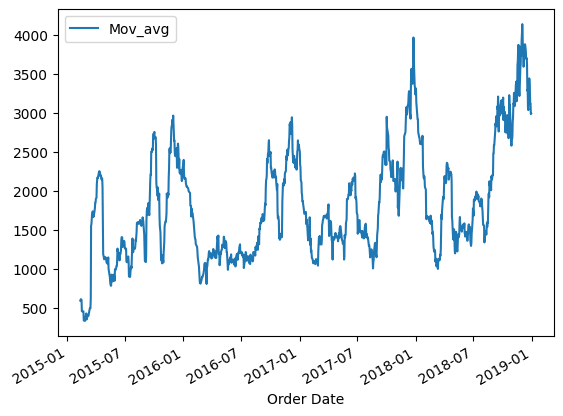

In [66]:
## moving avg monthly
week_df=df.groupby('Order Date')['Sales'].sum().reset_index()
week_df['Mov_avg']=week_df['Sales'].rolling(30).mean()
week_df.plot.line(x='Order Date',y='Mov_avg')


<ipython-input-67-e06c57060489>:5: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(df['Sales']).fit(


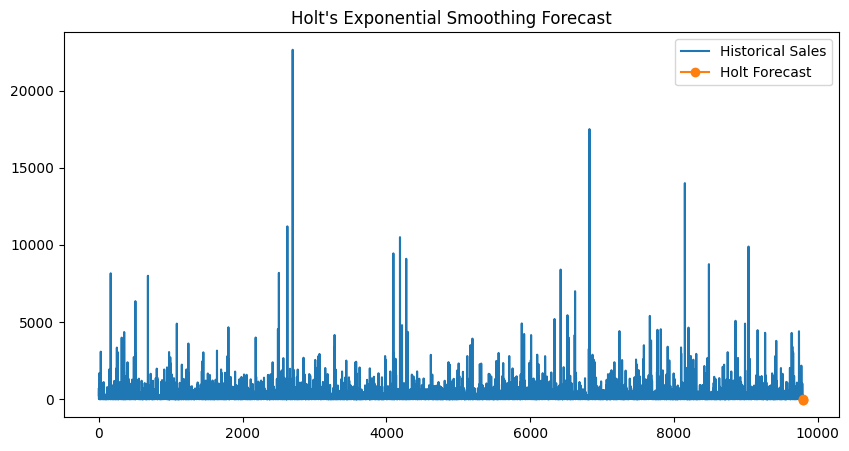

In [67]:
from statsmodels.tsa.api import Holt

# 1) Prepare data (same as before)
# 2) Fit Holt model
holt_model = Holt(df['Sales']).fit(
    smoothing_level=0.8,
    smoothing_slope=0.2,
    optimized=False
)

# 3) Forecast
forecast_horizon = 3
holt_forecast = holt_model.forecast(forecast_horizon)

# 4) Plot
plt.figure(figsize=(10,5))
plt.plot(df['Sales'], label='Historical Sales')
plt.plot(holt_forecast, label='Holt Forecast', marker='o')
plt.title("Holt's Exponential Smoothing Forecast")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


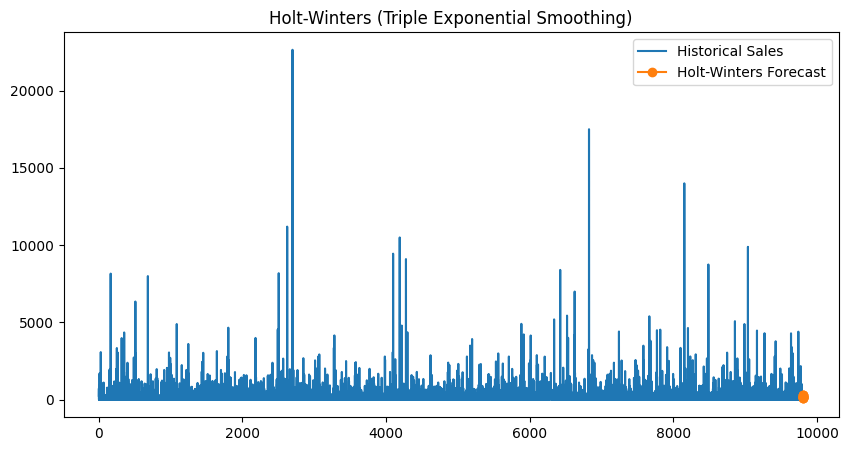

In [68]:
from statsmodels.tsa.api import ExponentialSmoothing

# 1) Prepare data (same as before)
# 2) Fit Holt-Winters
hw_model = ExponentialSmoothing(
    df['Sales'],
    trend='add',          # or 'mul' if multiplicative trend
    seasonal='add',       # or 'mul' if multiplicative seasonality
    seasonal_periods=12   # e.g., 12 for monthly data with yearly seasonality
).fit()

# 3) Forecast
forecast_horizon = 12
hw_forecast = hw_model.forecast(forecast_horizon)

# 4) Plot
plt.figure(figsize=(10,5))
plt.plot(df['Sales'], label='Historical Sales')
plt.plot(hw_forecast, label='Holt-Winters Forecast', marker='o')
plt.title("Holt-Winters (Triple Exponential Smoothing)")
plt.legend()
plt.show()
